In [9]:
import re

def extract_text(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()

        # Find the starting point (either "Abstract" or a 4-digit year)
        abstract_match = re.search(r"\nAbstract\n", content, re.IGNORECASE)
        year_match = re.search(r"\d{4}\)", content)

        start_index = None
        if abstract_match and year_match:
            start_index = min(abstract_match.end(), year_match.end())  # Use the earliest match
        elif abstract_match:
            start_index = abstract_match.end()
        elif year_match:
            start_index = year_match.end()

        if start_index is None:
            print("No valid start point ('Abstract' or year) found.")
            return None

        # Find the ending point ("Introduction", "PACS", or "Key words")
        introduction_match = re.search(r"Introduction\n", content, re.IGNORECASE)
        pacs_match = re.search(r"\bPACS\b", content, re.IGNORECASE)
        key_words_match = re.search(r"Key words:", content, re.IGNORECASE)

        end_index = None
        if introduction_match and pacs_match:
            end_index = min(introduction_match.start(), pacs_match.start())  # Use the earliest match
        elif introduction_match and key_words_match:
            end_index = min(introduction_match.start(), key_words_match.start())  # Use the earliest match
        elif key_words_match:
            end_index = key_words_match.start()
        elif introduction_match:
            end_index = introduction_match.start()
        elif pacs_match:
            end_index = pacs_match.start()

        if end_index is None:
            print("No valid end point ('Introduction', 'PACS', or 'Key words') found.")
            return None

        if start_index >= end_index:
            print("Start marker appears after the end marker.")
            return None

        extracted_text = content[start_index:end_index].strip()

        # Remove isolated characters or lines with random sequences
        filtered_lines = [line for line in extracted_text.split("\n") if len(line.strip()) > 1 and not re.match(r"^\s*[\w\d]{1,2}\s*$", line)]

        return "\n".join(filtered_lines)

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage:
file_path = "/content/Universal quantum computation on the power of quantum non-demolition measurements.txt"  # Replace with the actual file path
extracted_content = extract_text(file_path)

if extracted_content:
    print("\n--- Extracted Text ---\n")
    print(extracted_content)
    print("\n----------------------\n")


Error: File not found at /content/Universal quantum computation on the power of quantum non-demolition measurements.txt


In [10]:
import os
import re

def extract_text(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()

        # Find the starting point (either "Abstract" or a 4-digit year)
        abstract_match = re.search(r"\nAbstract\n", content, re.IGNORECASE)
        year_match = re.search(r"\d{4}\)", content)

        start_index = None
        if abstract_match and year_match:
            start_index = min(abstract_match.end(), year_match.end())  # Use the earliest match
        elif abstract_match:
            start_index = abstract_match.end()
        elif year_match:
            start_index = year_match.end()

        if start_index is None:
            print(f"No valid start point ('Abstract' or year) found in {file_path}.")
            return None

        # Find the ending point ("Introduction", "PACS", or "Key words")
        introduction_match = re.search(r"\nIntroduction\n", content, re.IGNORECASE)
        pacs_match = re.search(r"\bPACS\b", content, re.IGNORECASE)
        key_words_match = re.search(r"Key words:", content, re.IGNORECASE)

        end_index = None
        if introduction_match and pacs_match:
            end_index = min(introduction_match.start(), pacs_match.start())  # Use the earliest match
        elif introduction_match and key_words_match:
            end_index = min(introduction_match.start(), key_words_match.start())  # Use the earliest match
        elif key_words_match:
            end_index = key_words_match.start()
        elif introduction_match:
            end_index = introduction_match.start()
        elif pacs_match:
            end_index = pacs_match.start()

        if end_index is None:
            print(f"No valid end point ('Introduction', 'PACS', or 'Key words') found in {file_path}.")
            return None

        if start_index >= end_index:
            print(f"Start marker appears after the end marker in {file_path}.")
            return None

        extracted_text = content[start_index:end_index].strip()

        # Remove isolated characters or lines with random sequences
        filtered_lines = [line for line in extracted_text.split("\n") if len(line.strip()) > 1 and not re.match(r"^\s*[\w\d]{1,2}\s*$", line)]

        return "\n".join(filtered_lines)

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred with {file_path}: {e}")
        return None

# def process_folder(folder_path):
#     """ Process all .txt files in the specified folder """
#     if not os.path.exists(folder_path):
#         print(f"Error: Folder '{folder_path}' does not exist.")
#         return
# 
#     txt_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
# 
#     if not txt_files:
#         print(f"No .txt files found in '{folder_path}'.")
#         return
# 
#     for txt_file in txt_files:
#         file_path = os.path.join(folder_path, txt_file)
#         print(f"\n--- Processing {txt_file} ---\n")
#         extracted_content = extract_text(file_path)
#         if extracted_content:
#             print(extracted_content)
#             print("\n----------------------\n")
def process_folder(folder_path):
    """ Process all .txt files in the specified folder and return extracted abstracts """
    results = []

    if not os.path.exists(folder_path):
        print(f"Error: Folder '{folder_path}' does not exist.")
        return results

    txt_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

    for txt_file in txt_files:
        file_path = os.path.join(folder_path, txt_file)
        extracted_content = extract_text(file_path)
        if extracted_content:
            results.append((txt_file, extracted_content))

    return results


# Example usage:
folder_path = "/content/test"  # Replace with your actual folder path
process_folder(folder_path)


Error: Folder '/content/test' does not exist.


[]

In [11]:
import tarfile
import os

# Set your target extraction path
extract_path = "text_data"  # or any other folder name you prefer

# Extract the tar.gz file
with tarfile.open("text_data.tar.gz", "r:gz") as tar:
    tar.extractall(path=extract_path)

print("Extraction complete.")


Extraction complete.


In [12]:
from pathlib import Path

results = []
base_path = Path("text_data/text_data")

for txt_file in base_path.rglob("*.txt"):
    file_path = str(txt_file)
    extracted_content = extract_text(file_path)

    print(f"{file_path}: {bool(extracted_content)}")

    if extracted_content:
        results.append((txt_file.name, extracted_content))


text_data/text_data/2013/Hybrid architecture for encoded measurement-based quantum computation.txt: True
No valid end point ('Introduction', 'PACS', or 'Key words') found in text_data/text_data/2013/Solving systems of linear equations on a quantum computer.txt.
text_data/text_data/2013/Solving systems of linear equations on a quantum computer.txt: False
Start marker appears after the end marker in text_data/text_data/2013/Higher-order semantics for quantum programming languages with classical control.txt.
text_data/text_data/2013/Higher-order semantics for quantum programming languages with classical control.txt: False
Start marker appears after the end marker in text_data/text_data/2013/Experimental Realization of Nonadiabatic Holonomic Quantum Computation.txt.
text_data/text_data/2013/Experimental Realization of Nonadiabatic Holonomic Quantum Computation.txt: False
No valid end point ('Introduction', 'PACS', or 'Key words') found in text_data/text_data/2013/Commuting Local Hamiltonia

In [13]:
import torch
print(torch.__version__)  # Should be valid
print(torch.cuda.is_available())  # Should say False on Mac, that's fine

2.5.1
False


In [16]:
import pandas as pd

df = pd.DataFrame(results, columns=["filename", "abstract"])
print(df.shape)
df.head()


(731, 2)


,filename,abstract
0,Hybrid architecture for encoded measurement-ba...,We present a hybrid scheme for quantum computa...
1,Mini-maximizing two qubit quantum computations...,Two qubit quantum computations are viewed as t...
2,Entangling Power in the Deterministic Quantum ...,The deterministic quantum computing with one q...
3,Measurement-Based Quantum Computation on Two-B...,A cluster state cannot be a unique ground stat...
4,Ancilla Driven Quantum Computation with arbitr...,We extend the model of Ancilla Driven Quantum ...


In [17]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(df["abstract"].tolist(), show_progress_bar=True)

/Users/irenecolombo/anaconda3/envs/torch-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 23/23 [01:03<00:00,  2.76s/it]


In [18]:
from sklearn.cluster import KMeans

n_clusters = 10  # You can tune this
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df["cluster"] = kmeans.fit_predict(embeddings)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [19]:
for i in range(n_clusters):
    print(f"\nCluster {i}")
    print(df[df["cluster"] == i]["filename"].head(3).tolist())



Cluster 0
['Hybrid valence-bond states for universal quantum computation.txt', 'Space-Time Topology in Teleportation-Based Quantum Computation.txt', 'Elementary Particles as Gates for Universal Quantum Computation.txt']

Cluster 1
['Mini-maximizing two qubit quantum computations.txt', 'Ancilla Driven Quantum Computation with arbitrary entangling strength.txt', 'The universe as quantum computer.txt']

Cluster 2
['Validity of rotating wave approximation in non-adiabatic holonomic quantum computation.txt', 'A family of [[6k, 2k, 2]] codes for practical, scalable adiabatic quantum computation.txt', 'Feedback-controlled adiabatic quantum computation.txt']

Cluster 3
['Quantum Cybernetics and Complex Quantum Systems Science - A Quantum Connectionist Exploration.txt', 'Quantum computational intelligence for traveltime seismic inversion.txt', 'An approach to interfacing the brain with quantum computers: practical steps and caveats.txt']

Cluster 4
['Hybrid architecture for encoded measurement

In [ ]:
df.to_csv("clustered_abstracts.csv", index=False)

/Users/irenecolombo/anaconda3/envs/torch-env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


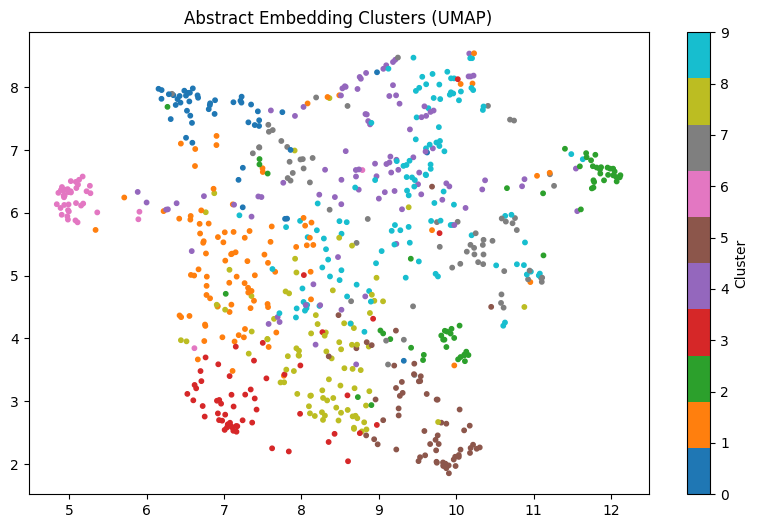

In [21]:
import umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
embedding_2d = reducer.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=df["cluster"], cmap="tab10", s=10)
plt.colorbar(label="Cluster")
plt.title("Abstract Embedding Clusters (UMAP)")
plt.show()


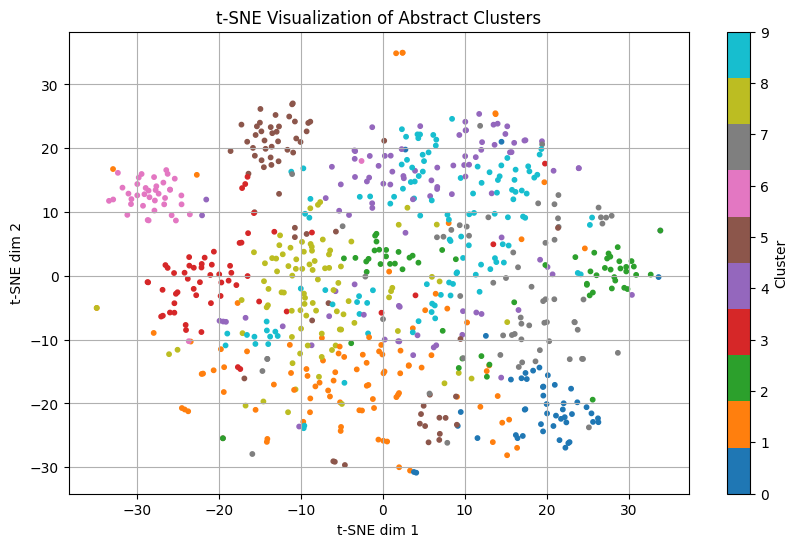

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Run t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init="pca", learning_rate="auto")
embedding_2d = tsne.fit_transform(embeddings)

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=df["cluster"], cmap="tab10", s=10)
plt.colorbar(scatter, label="Cluster")
plt.title("t-SNE Visualization of Abstract Clusters")
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
plt.grid(True)
plt.show()


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Set up the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)

for i in range(n_clusters):
    cluster_texts = df[df['cluster'] == i]['abstract'].tolist()
    tfidf = vectorizer.fit_transform(cluster_texts)
    keywords = vectorizer.get_feature_names_out()
    print(f"\nCluster {i} keywords:")
    print(", ".join(keywords))



Cluster 0 keywords:
based, computation, computational, computer, computing, dimensional, gates, lattice, majorana, measurement, model, quantum, qubit, resource, spin, state, states, symmetry, topological, universal

Cluster 1 keywords:
105, 2020, algorithm, available, cid, classical, computation, computer, error, gate, gates, international, number, online, quantum, qubit, qubits, state, states, time

Cluster 2 keywords:
adiabatic, based, computation, control, decoherence, errors, evolution, gate, gates, geometric, holonomic, nonadiabatic, quantum, qubit, scheme, state, states, systems, time, using

Cluster 3 keywords:
algorithms, classical, computation, computer, computers, computing, data, ethical, ethics, example, information, learning, machine, model, quantum, research, state, states, systems, technologies

Cluster 4 keywords:
based, cid, computation, computers, computing, en, entropy, error, errors, fault, la, log, measurement, model, noise, quantum, qubit, qubits, signalling, sta